# Buat file outlier biar bisa fokus

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uji Statistic

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Supermarket Customers.csv', sep='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


mencari sesuatu yang tidak masuk akal

In [3]:
### Membuat kolom tanggal acuan data dikumpulkan
df['Observed_Time'] = '2015-02-02'
df['Observed_Time'] = pd.to_datetime(df['Observed_Time'])
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [4]:
### Membuat kolom umur dari data Year_Birth agar lebih mudah dipahami
df['Age'] = 2015 - df['Year_Birth']

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,2015-02-02,58
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,2015-02-02,61
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,2015-02-02,50
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,3,11,0,2015-02-02,31
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,2015-02-02,34


In [6]:
## Mengelompokan ketagori customer kedalam segmentasi berdasarkan kelahiran

kel=[]
for i in range(len(df)):
    if df['Year_Birth'][i]<1945:
        kel.append('Pre-boomer')
    elif df['Year_Birth'][i]<=1945 or df['Year_Birth'][i]<=1964:
        kel.append('Baby boomer')
    elif df['Year_Birth'][i]<=1965 or df['Year_Birth'][i]<=1980:
        kel.append('Gen X')
    elif df['Year_Birth'][i]<=1981 or df['Year_Birth'][i]<=1996:
        kel.append('Milenial')
    else:
        kel.append('Gen Z')

df['Generation_Types'] = kel

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Age,Generation_Types
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,3,11,1,2015-02-02,58,Baby boomer
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,2015-02-02,61,Baby boomer
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,2015-02-02,50,Gen X
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,3,11,0,2015-02-02,31,Milenial
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,2015-02-02,34,Milenial


cek outlier berdasarkan kolom `Age` untuk mengetahui selisih umur

In [8]:
# function visual untuk cek outlier

def visual_histplot(col):
    plt.figure(figsize=(6,4), dpi=100)
    sns.histplot(df[col],kde=True)
    plt.title('Distribusi data ' + col)
    plt.show()
    
def visual_boxplot(col):
    plt.figure(figsize=(6,4), dpi=100)
    sns.boxplot(df[col])
    plt.title('Outlier data '+ col +' dalam bentuk Boxplot')
    plt.show()
    
def visual_countplot(col, hue=None):
    plt.figure(figsize=(6,4), dpi=100)
    sns.countplot(data=df, x=col, hue=hue)
    plt.title('Distribusi data ' + col)
    plt.show()

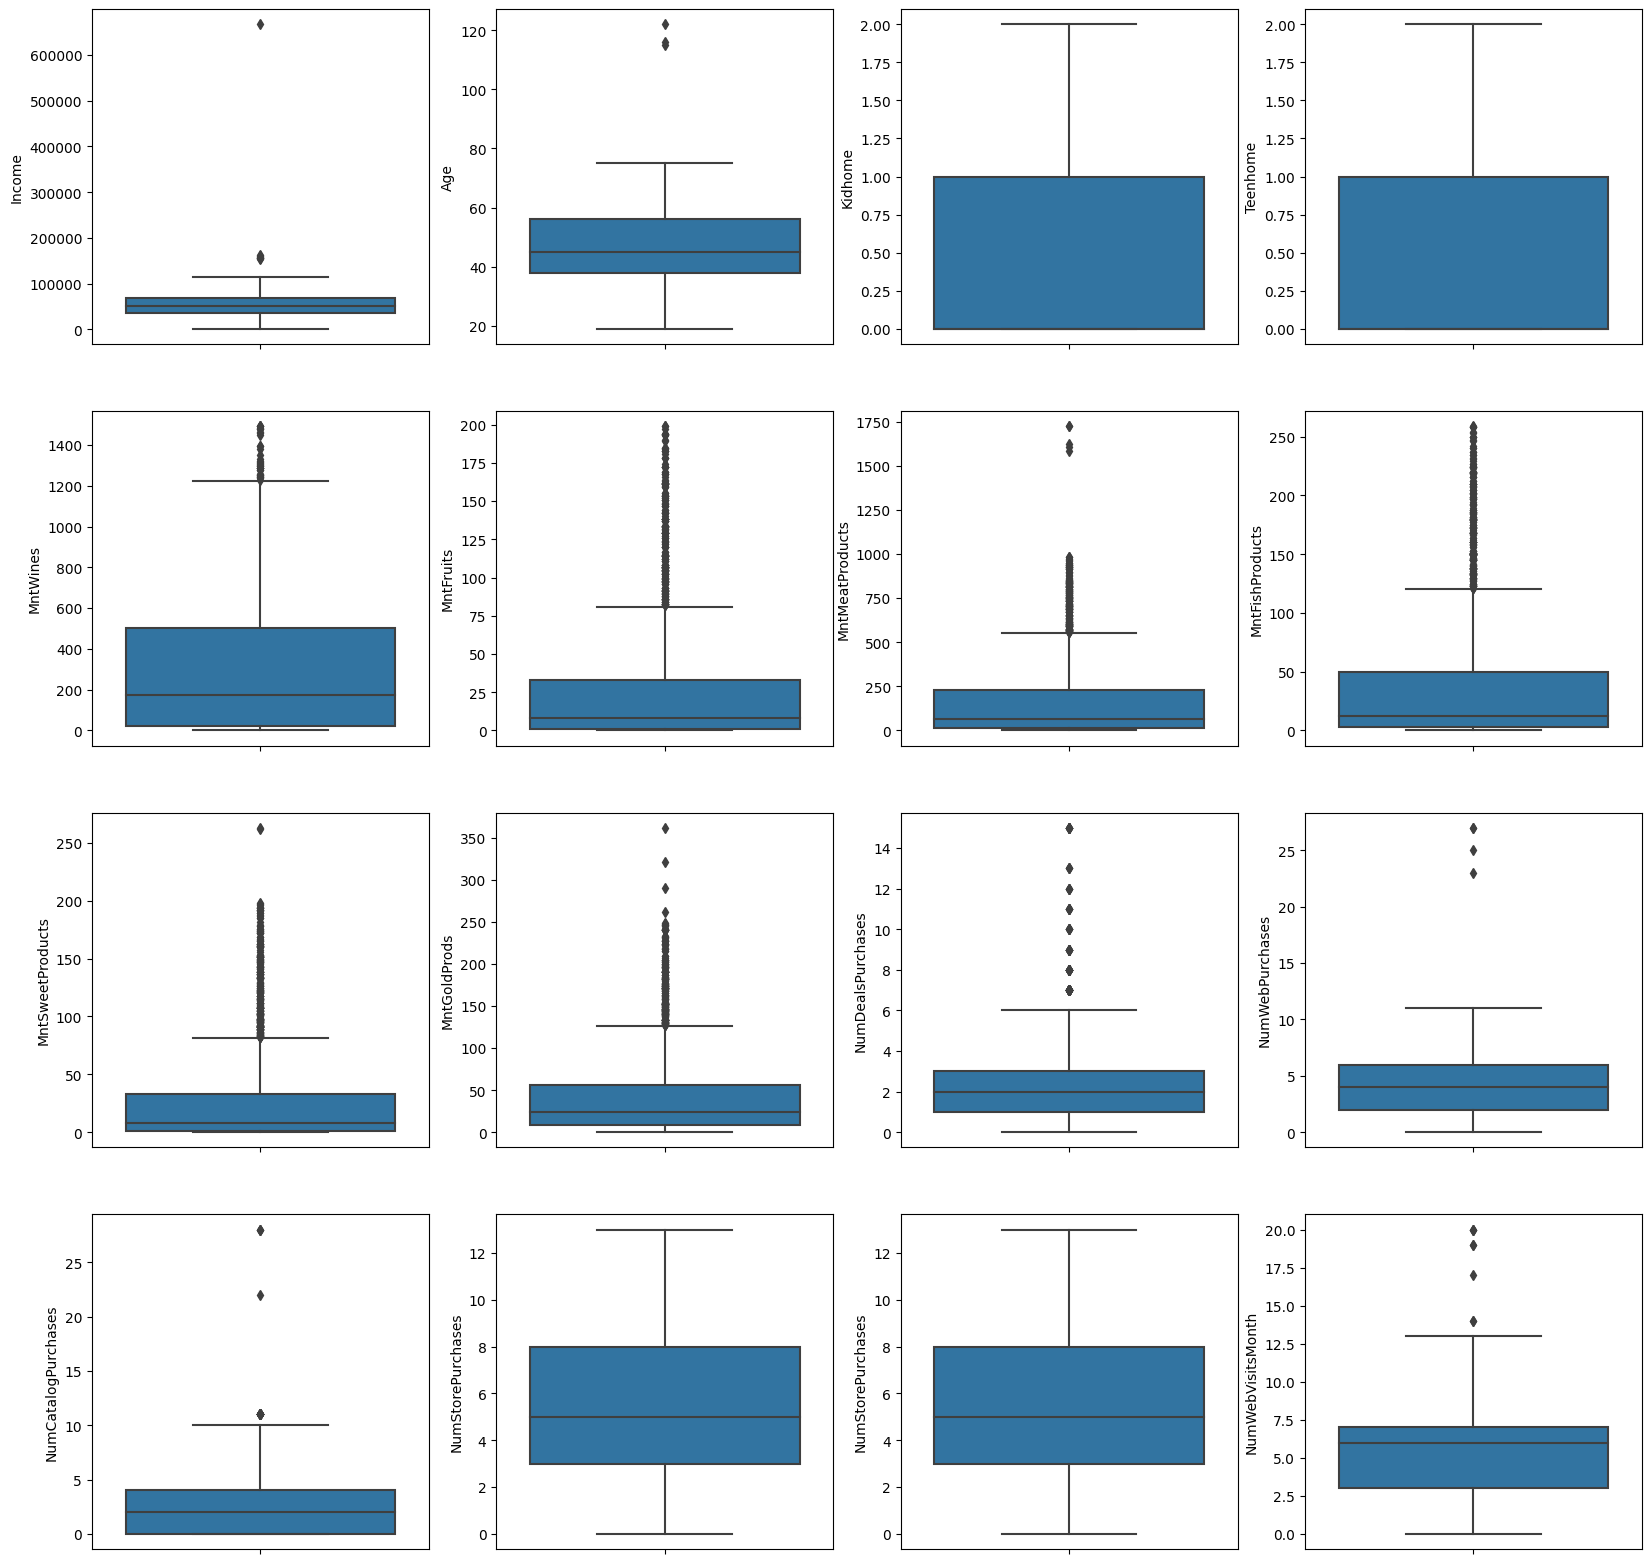

In [9]:
fig, ax = plt.subplots(4, 4, figsize = (20,20))

# People
sns.boxplot(data=df, y=df["Income"], x=None, ax = ax[0][0])     # Ada Outlier
sns.boxplot(data=df, y=df['Age'], x=None, ax = ax[0][1])        # Ada Outlier
sns.boxplot(data=df, y=df["Kidhome"],x=None, ax = ax[0][2])
sns.boxplot(data=df, y=df["Teenhome"], ax = ax[0][3])

# Products
sns.boxplot(data=df, y=df["MntWines"], ax = ax[1][0]) 
sns.boxplot(data=df, y=df["MntFruits"], ax = ax[1][1])
sns.boxplot(data=df, y=df["MntMeatProducts"], ax = ax[1][2])
sns.boxplot(data=df, y=df["MntFishProducts"], ax = ax[1][3])      # Ada Outlier
# -----------------------
sns.boxplot(data=df, y=df["MntSweetProducts"], ax = ax[2][0])      # Ada Outlier
sns.boxplot(data=df, y=df["MntGoldProds"], ax = ax[2][1])      # Ada Outlier

# Promotion
sns.boxplot(data=df, y=df["NumDealsPurchases"], ax = ax[2][2])      # Ada Outlier

# Place
sns.boxplot(data=df, y=df["NumWebPurchases"], ax = ax[2][3])      # Ada Outlier
# ----------------------
sns.boxplot(data=df, y=df["NumCatalogPurchases"], ax = ax[3][0])
sns.boxplot(data=df, y=df["NumStorePurchases"], ax = ax[3][1])
sns.boxplot(data=df, y=df["NumStorePurchases"], ax = ax[3][2])
sns.boxplot(data=df, y=df["NumWebVisitsMonth"], ax = ax[3][3])





plt.show(1)

#### Penjelasan untuk data Outlier:

Dari hasil hampir semua kolom yang di seleksi untuk pengecekan apakah setiap datanya ada yang outlier, maka dari itu ada 16 kolom yang dicek dengan detail sebagai berikut:
**Customers**
1. `Income` : di kolom tersebut ada outlier yang selisih angkanya dengan yang lain sangat terlihat jelas dari hasil tersebut akan di drop karena jika di kategorikan sebagai data prioritas dan memiliki penanganan khusus sebagai pelanggan.
2. `Age` : di kolom ini ada outlier untuk umur yang diatas 80th, akan di drop karena diasumsikan bahwa kebanyakan untuk seseorang yang sudah berumur diatas 80th harusnya untuk berbelanja sudah dibantu oleh orang lain.
3. `Kidhome` : Melakukan pengecekan outlier karena hanya ingin melihat selisih anak-anak yang dimiliki pelanggan, namun ternyata terlihat tidak ada yang anomali.
4. `Teenhome` : Melakukan pengecekan outlier karena hanya ingin melihat selisih anak remaja yang dimiliki pelanggan, namun ternyata terlihat tidak ada yang anomali.

**Products**
1. `MntWines` : pengecekan untuk kolom tersebut hanya ingin mengetahui apakah ada pola pembelian yang tinggi dari customer atau tidak
2. `MntFruits` : pengecekan untuk kolom tersebut hanya ingin mengetahui apakah ada pola pembelian yang tinggi dari customer atau tidak
3. `MntMeatProducts` : Terdapat Outlier yang memiliki selisih yang lumayan dari kolom ini dan akan dilakukan pengecekan lebih dalam apakah yang customer belanjakan untuk daging dengan incomenya sesuai atau tidak.
4. `MntFishProducts` : pengecekan untuk kolom tersebut hanya ingin mengetahui apakah ada pola pembelian yang tinggi dari customer atau tidak
5. `MntSweetProducts` : pengecekan untuk kolom tersebut hanya ingin mengetahui apakah ada pola pembelian yang tinggi dari customer atau tidak
6. `MntGoldProds` : pengecekan untuk kolom tersebut hanya ingin mengetahui apakah ada pola pembelian yang tinggi dari customer atau tidak

**Promotion**
1. `NumDealsPurchases` : Sebenarnya hanya untuk ingin mengetahui outlier pada data tersebut, bahkan jika ada outliernya pun tidak di permasalahkan karena sebagai data acuan.

**Place**
1. `NumWebPurchases` : untuk melakukan pengecekan hanya adanya outlier atau tidak
2. `NumCatalogPurchases` : untuk melakukan pengecekan hanya adanya outlier atau tidak
3. `NumStorePurchases` : untuk melakukan pengecekan hanya adanya outlier atau tidak
4. `NumWebVisitsMonth` : untuk melakukan pengecekan hanya adanya outlier atau tidak

In [10]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Observed_Time', 'Age', 'Generation_Types'],
      dtype='object')

In [19]:
# Melakukan pengecekan untuk kolom MntMeatProducts
df[['ID','Income','MntMeatProducts']].sort_values('MntMeatProducts', ascending=False).head(5)

,ID,Income,MntMeatProducts
1653,4931,157146.0,1725
21,5376,2447.0,1725
687,1501,160803.0,1622
2228,8720,NaN,1607
164,8475,157243.0,1582


Masih menjadi pertimbangan untuk melakukan aksi drop rows untuk yang memiliki daftar belanjaan selama 2 tahun diatas 1000 dengan tidak adanya penghasilan.

#### Cek Data Duplicate

In [12]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Age,Generation_Types


Terlihat diantara semua kolom yang tersedia tidak ada data duplikat.

In [13]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Age,Generation_Types
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,2015-02-02,48,Gen X
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,1,0,0,3,11,0,2015-02-02,69,Baby boomer
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,2015-02-02,34,Milenial
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,2015-02-02,59,Baby boomer
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,0,0,0,0,3,11,1,2015-02-02,61,Baby boomer
